In [38]:
import math

def f(x):
    return -x/(1+math.exp(x))
    


In [40]:
from scipy import optimize

optimize.fminbound(f, 0,2)
print(f(optimize.fminbound(f, 0,2)))

-0.2784645427610733


In [1]:
import sklearn
import pickle
import numpy as np
import pandas as pd
import math
import random

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.externals import joblib
DT_model = joblib.load("./model/dt_test")

In [2]:
day1 = pickle.load(open("./expdata1/demand20160103","rb"))
print(len(day1))
day2 = pickle.load(open("./expdata1/demand20160104","rb"))
print(len(day2))
day3 = pickle.load(open("./expdata1/demand20160105","rb"))
print(len(day3))
day4 = pickle.load(open("./expdata1/demand20160106","rb"))
print(len(day4))
day5 = pickle.load(open("./expdata1/demand20160107","rb"))
print(len(day5))
day6 = pickle.load(open("./expdata1/demand20160108","rb"))
print(len(day6))
day7 = pickle.load(open("./expdata1/demand20160109","rb"))
print(len(day7))
nodedict = pickle.load(open("./NodePosition", "rb"))
DistanceDict = pickle.load(open("./DijShortestPathLength", "rb"))

297294
308458
334327
340218
356460
383118
397847


In [3]:
puhub_fre_dict = {}
dohub_fre_dict = {}
for node in nodedict:
    puhub_fre_dict[node] = 0
    dohub_fre_dict[node] = 0
 

In [4]:
for r in day1:
    print(r[5])
    break

4443775465.0


In [5]:
def fre_collect(data):
    for r in data:
        try:
            pu = r[1]
            do = r[5]
            puhub_fre_dict[pu]+=1
            dohub_fre_dict[do]+=1
        except:
            pass

In [6]:
fre_collect(day1)
fre_collect(day2)
fre_collect(day3)
fre_collect(day4)
fre_collect(day5)
fre_collect(day6)
fre_collect(day7)

In [7]:

count = 0
for hub in puhub_fre_dict:
    count += puhub_fre_dict[hub]
print(count)
print(puhub_fre_dict)

2417222
{42421728: 264, 42421731: 130, 42421737: 796, 42421741: 461, 42421745: 499, 42421749: 363, 42421751: 9, 42421769: 617, 42421772: 976, 42421775: 682, 42421776: 426, 42421778: 5, 42421783: 4, 42421785: 0, 42421786: 3, 42421791: 0, 42421800: 927, 42421803: 1167, 42421806: 738, 42421809: 718, 42421810: 739, 42421820: 16, 42421828: 18, 42421852: 108, 42421857: 414, 42421865: 33, 42421877: 1314, 42421889: 2155, 42421941: 558, 42421946: 146, 42421951: 57, 42421960: 733, 42421965: 19, 42421969: 1002, 42421972: 570, 42421974: 307, 42421982: 429, 42421985: 873, 42421993: 558, 42421996: 982, 42422000: 533, 42422006: 793, 42422016: 671, 42422018: 25, 42422026: 0, 42422028: 319, 42422038: 415, 42422042: 731, 42422050: 93, 42422053: 275, 42422056: 384, 42422086: 4, 42422258: 70, 42422270: 1435, 42422283: 201, 42422366: 3, 42422399: 4, 42422509: 40, 42422530: 32, 42422545: 0, 42422592: 23, 42422899: 942, 42423020: 403, 42423039: 2, 42423051: 4591, 42423070: 1, 42423101: 0, 42423116: 2, 424231

In [8]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for node in puhub_fre_dict:
    if puhub_fre_dict[node] < 10:
        count0 += 1
    elif puhub_fre_dict[node] < 100:
        count1 += 1
    elif puhub_fre_dict[node] < 500:
        count2 += 1
    elif puhub_fre_dict[node] < 1000:
        count3 += 1
    elif puhub_fre_dict[node] < 2500:
        count4 += 1
    else:
        count5 += 1
print(count0,count1,count2,count3,count4,count5)
        
        


1078 966 899 587 707 138


In [9]:
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0
for node in dohub_fre_dict:
    if dohub_fre_dict[node] < 10:
        count0 += 1
    elif dohub_fre_dict[node] < 100:
        count1 += 1
    elif dohub_fre_dict[node] < 500:
        count2 += 1
    elif dohub_fre_dict[node] < 1000:
        count3 += 1
    elif dohub_fre_dict[node] < 2500:
        count4 += 1
    else:
        count5 += 1
print(count0,count1,count2,count3,count4,count5)

354 1292 1269 666 695 99


In [10]:
puhub_type_dict = {}
dohub_type_dict = {}

for node in nodedict:
    puhub_type_dict[node] = 0
    dohub_type_dict[node] = 0

for node in puhub_fre_dict:
    if puhub_fre_dict[node] < 10:
        puhub_type_dict[node] = 0
    elif puhub_fre_dict[node] < 100:
        puhub_type_dict[node] = 1
    elif puhub_fre_dict[node] < 500:
        puhub_type_dict[node] = 2
    elif puhub_fre_dict[node] < 1000:
        puhub_type_dict[node] = 3
    elif puhub_fre_dict[node] < 2500:
        puhub_type_dict[node] = 4
    else:
        puhub_type_dict[node] = 5

for node in dohub_fre_dict:
    if dohub_fre_dict[node] < 10:
        dohub_type_dict[node] = 0
    elif dohub_fre_dict[node] < 100:
        dohub_type_dict[node] = 1
    elif dohub_fre_dict[node] < 500:
        dohub_type_dict[node] = 2
    elif dohub_fre_dict[node] < 1000:
        dohub_type_dict[node] = 3
    elif dohub_fre_dict[node] < 2500:
        dohub_type_dict[node] = 4
    else:
        dohub_type_dict[node] = 5
    

In [91]:
put = open("./pu_type_dict","wb")
pickle.dump(puhub_type_dict,put)
put.close()


In [92]:
dot = open("./do_type_dict","wb")
pickle.dump(dohub_type_dict,dot)
dot.close()

In [11]:
print(dohub_type_dict)

{42421728: 2, 42421731: 2, 42421737: 3, 42421741: 3, 42421745: 2, 42421749: 2, 42421751: 2, 42421769: 3, 42421772: 4, 42421775: 2, 42421776: 2, 42421778: 1, 42421783: 1, 42421785: 1, 42421786: 1, 42421791: 1, 42421800: 4, 42421803: 4, 42421806: 3, 42421809: 3, 42421810: 3, 42421820: 2, 42421828: 2, 42421852: 2, 42421857: 2, 42421865: 2, 42421877: 4, 42421889: 4, 42421941: 2, 42421946: 2, 42421951: 2, 42421960: 2, 42421965: 1, 42421969: 3, 42421972: 3, 42421974: 2, 42421982: 2, 42421985: 3, 42421993: 3, 42421996: 3, 42422000: 4, 42422006: 3, 42422016: 3, 42422018: 2, 42422026: 0, 42422028: 2, 42422038: 2, 42422042: 2, 42422050: 2, 42422053: 2, 42422056: 3, 42422086: 1, 42422258: 2, 42422270: 5, 42422283: 2, 42422366: 0, 42422399: 1, 42422509: 2, 42422530: 1, 42422545: 0, 42422592: 2, 42422899: 4, 42423020: 2, 42423039: 1, 42423051: 5, 42423070: 0, 42423101: 1, 42423116: 0, 42423189: 0, 42423203: 1, 42423295: 2, 42423296: 5, 42423307: 5, 42423331: 0, 42423456: 2, 42423549: 1, 42423564: 3

In [12]:
def share_dis_est(dis):
    if dis < 2000:
        return 0.795
    elif dis < 4000:
        return 0.7
    elif dis < 10000:
        return 0.68
    elif dis < 12000:
        return 0.66
    elif dis < 14000:
        return 0.64
    else:
        return 0.63

In [13]:
def lrdata_processor(data,share_ratio,wt):
  
    time = []
    pu = []
    do = []
    distance = []
    discount = []
    cost_pct = []
    accept = []
    
    
    for r in data:
        try:
            p_lon = r[2]
            p_lat = r[3]
            d_lon = r[6]
            d_lat = r[7]
            dis = DistanceDict[int(r[1])][int(r[5])]
            sec = r[0]
            share_pct = share_dis_est(share_ratio*dis)
           
            
            costpct = get_costpct(sec,p_lon,p_lat,d_lon,d_lat,dis,share_pct,share_ratio)
            cost_pct.append(costpct)
            
           
            timelabel = time_classify(wt,sec)
                
            
                
            pulabel = puhub_type_dict[int(r[1])]
            dolabel = dohub_type_dict[int(r[5])]
            pu.append(pulabel)
            time.append(timelabel)
            do.append(dolabel)
            
            if dis < 14000:
                distance.append(dis/14000)
            else:
                distance.append(1)
            
          
            
            disc = random.randint(np.round(share_ratio*60),95)/100
            discount.append(disc)
            
            judge = costpct
            
            
            
            if timelabel == 0:
                timejudge = random.randint(-10,0)/100
                
            if timelabel == 1:
                timejudge = random.randint(-5,5)/100
                
            if timelabel == 2:
                timejudge = random.randint(5,15)/100
                
                
            if pulabel == 0:
                hubjudgep = random.randint(0,5)/100
                
            elif pulabel <= 3:
                hubjudgep = random.randint(-5,5)/100
                
            else:
                hubjudgep = random.randint(5,15)/100
           
        
            if dolabel == 0:
                hubjudged = random.randint(0,10)/100
                
            elif dolabel <= 3:
                hubjudged = random.randint(-5,5)/100
                
            else:
                hubjudged = random.randint(-10,0)/100
            
            
            if dis < 4000:
                disjudge = random.randint(0,10)/100
            elif dis < 8000:
                disjudge = random.randint(-5,5)/100
            else:
                disjudge = random.randint(-10,0)/100
                
            
                
            
            
            
            judge = judge + timejudge + hubjudgep + hubjudged + disjudge
            
            
            if judge > disc:
                accept.append(1)
            else:
                accept.append(0)
        except:
            pass
   
    print(len(time),len(pu),len(do),len(distance),len(discount),len(accept))   
    d = { 'time': time, 'PLabel':pu, 'DLabel':do, 'Distance':distance, 'Discount':discount, 'label':accept}
    df = pd.DataFrame(d,columns=['time','PLabel','DLabel','Distance','Discount','label'])
    #df_rd = pd.DataFrame(d_rd,columns=['time','PickupLon','PickupLat','DropoffLon','DropoffLat','Distance','label'])    
    return df

In [14]:
def get_costpct(t,pu_lon,pu_lat,do_lon,do_lat,dis,share_pct,share_ratio):
    
    tt = [t]
    plon = [pu_lon]
    plat = [pu_lat]
    dlon = [do_lon]
    dlat = [do_lat]
    dist = [dis]
    
    d_tmp = { 'time': tt, 'PickupLon':plon, 'PickupLat':plat, 'DropoffLon':dlon, 'DropoffLat':dlat,'Distance':dist}
    df_tmp = pd.DataFrame(d_tmp,columns=['time','PickupLon','PickupLat','DropoffLon','DropoffLat','Distance'])
    X_predict = df_tmp.values[:,0:6]
    pro = DT_model.predict_proba(X_predict)
    p = pro[0][1]
    cost_pct = p*(0.5*share_ratio*share_pct + share_ratio*(1-share_pct)) + (1-p)
    
    if cost_pct > 1:
        cost_pct = 1
    return cost_pct
    

In [15]:
def time_classify(w,time):
    if w == 0:
        if time < 7200:
            return 2
        elif time < 4*3600:
            return 1
        elif time < 8*3600:
            return 0
        elif time < 12*3600:
            return 1
        else:
            return 2
    else:
        if time < 6*3600:
            return 0
        elif time < 8*3600:
            return 1
        elif time < 10*3600:
            return 2
        elif time < 17*3600:
            return 1
        elif time < 21*3600:
            return 2
        else:
            return 1
        

In [16]:
df_day1 = lrdata_processor(day1,1.13,0)
print(len(df_day1))
df_day2 = lrdata_processor(day2,1.13,1)
print(len(df_day2))
df_day3 = lrdata_processor(day3,1.13,1)
print(len(df_day3))
df_day4 = lrdata_processor(day4,1.13,1)
print(len(df_day4))
df_day5 = lrdata_processor(day5,1.13,1)
print(len(df_day5))
df_day6 = lrdata_processor(day6,1.13,1)
print(len(df_day6))
df_day7 = lrdata_processor(day7,1.13,0)
print(len(df_day7))

296879 296879 296879 296879 296879 296879
296879
308365 308365 308365 308365 308365 308365
308365
334225 334225 334225 334225 334225 334225
334225
340131 340131 340131 340131 340131 340131
340131
356360 356360 356360 356360 356360 356360
356360
383007 383007 383007 383007 383007 383007
383007
397745 397745 397745 397745 397745 397745
397745


In [29]:
df_ml = pd.concat([df_day1,df_day2,df_day3,df_day4,df_day5,df_day6,df_day7])
print(len(df_ml))

2416712


In [30]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df_ml, test_size = 0.3, random_state=66)
print(len(df_train))
print(len(df_test))


1691698
725014


In [31]:
from sklearn.linear_model import LogisticRegression
X_train = df_train.values[:,0:5]
y_train = df_train.values[:,5]
X_test = df_test.values[:,0:5]
y_test = df_test.values[:,5]
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [69]:
print(lr.intercept_)
print(lr.coef_)
print(lr.intercept_scaling)

[12.66957731]
[[  1.47865065   0.71351123  -0.37557278  -1.53336768 -18.21603234]]
1


In [65]:
lr.get_params()

{'C': 1000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [136]:
y_pred = lr.predict(X_test)
y_auc = np.array(y_test)

pred_auc = np.array(y_pred)
print(np.sum(y_pred))
print(np.sum(y_test))
print(roc_auc_score(y_auc, pred_auc))
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)

489128.0
461984.0
0.7615030653624889
Accuracy is  78.97364740542942


In [76]:
print(X_train)
print(y_train)

[[2.         4.         4.         0.07280593 0.73      ]
 [1.         4.         4.         0.32917579 0.89      ]
 [1.         3.         4.         0.19254857 0.92      ]
 ...
 [1.         3.         2.         0.44424014 0.69      ]
 [2.         3.         3.         0.0823205  0.73      ]
 [1.         4.         4.         0.11235621 0.81      ]]
[1. 0. 1. ... 0. 1. 0.]


In [77]:
lr.predict_proba(X_train)


array([[0.02740371, 0.97259629],
       [0.77154126, 0.22845874],
       [0.90615169, 0.09384831],
       ...,
       [0.09217436, 0.90782564],
       [0.03853976, 0.96146024],
       [0.36061124, 0.63938876]])

In [78]:
sum(lr.predict_proba(X_train))

array([ 613330.68237074, 1078367.31762934])

In [79]:
print(X_train[0])
print(lr.coef_[0][4])

[2.         4.         4.         0.07280593 0.73      ]
-18.216032339646155


In [80]:
c = lr.coef_[0][0]*X_train[0][0]+lr.coef_[0][1]*X_train[0][1]+lr.coef_[0][2]*X_train[0][2]+lr.coef_[0][3]*X_train[0][3]

In [81]:
print(c)

4.197416830723864


In [83]:
print(1/(1+math.exp(-(lr.coef_[0][4]*0.73+c+lr.intercept_))))

0.9725962860231038


In [107]:
def f(x):
    return -(8*x-1.5)/(1+math.exp(-(lr.coef_[0][4]*x+c+lr.intercept_)))

In [110]:
from scipy import optimize
print(optimize.fminbound(f, 0.6,1))
print(f(optimize.fminbound(f, 0.6,1)))
print(f(0.866))

0.7987994425700042
-4.451221343352028
-4.0641674557526875


In [93]:
joblib.dump(lr,"./model/lr")

['/Users/jasonsun/PycharmProjects/untitled/finalproject/model/lr']

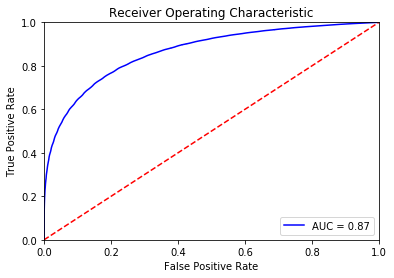

In [135]:
from sklearn import metrics
probs = lr.predict_proba(X_test)
preds = lr.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
%matplotlib inline 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

725014
725014


IndexError: too many indices for array

IndexError: tuple index out of range

NameError: name 'datasets' is not defined